In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
spams = pd.read_csv('/Users/da_learners_m1_18/Downloads/spam.csv', encoding="latin-1")
#/Users/da_learner_mac_45/Downloads
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
spams.shape

(5572, 5)

In [12]:
spams.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Name the columns accordingly

In [13]:
spams.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
#print("Count of label:n",spams['label'].value_counts())


In [15]:
non_spam_ratio = round(len(spams[spams['v1'] == 0])/len(spams['v1']) * 100, 2)
spam_ratio = round(len(spams[spams['v1'] == 1])/len(spams['v1']) * 100, 2)

# Print the ratios
print("Not a Spam Email Ratio with label(0):", non_spam_ratio, "%")
print("Spam Email Ratio with label(1):", spam_ratio, "%")

Not a Spam Email Ratio with label(0): 0.0 %
Spam Email Ratio with label(1): 0.0 %


In [16]:
spams['length'] = spams.v2.str.len()
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [17]:
!pip install stopwords




[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


DATA ANALYSIS

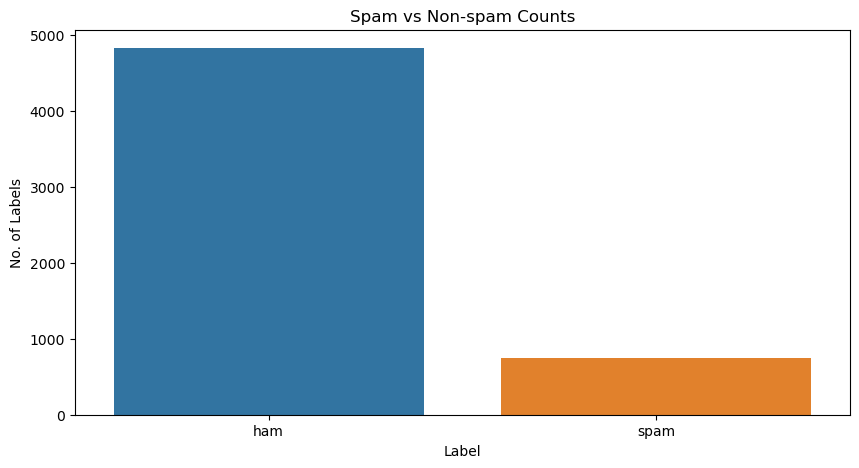

In [18]:

plt.figure(figsize=(10,5))
sns.countplot(x='v1', data=spams)
plt.xlabel('Label')
plt.ylabel('No. of Labels')
plt.title('Spam vs Non-spam Counts')
plt.show()

In [19]:
spams['label'] = spams['v1'].map({'ham': 0, 'spam': 1})
spams['message']=spams['v2']
spams.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4','v1','v2'], axis=1, inplace=True)
spams.head()


,length,label,message
0,111,0,"Go until jurong point, crazy.. Available only ..."
1,29,0,Ok lar... Joking wif u oni...
2,155,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,49,0,U dun say so early hor... U c already then say...
4,61,0,"Nah I don't think he goes to usf, he lives aro..."


BALANCE DATA

In [20]:
ham=spams[spams["label"]==0]
spam=spams[spams["label"]==1]

In [21]:
ham.shape,spam.shape

((4825, 3), (747, 3))

In [22]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 3)

In [23]:
data=spam.append(ham,ignore_index=True)
print("Shape :",data.shape)
data.head()

Shape : (1494, 3)


/var/folders/l_/lp5h3pmn2fs0lh819_gfmp_00000gn/T/ipykernel_4227/1966939139.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=spam.append(ham,ignore_index=True)


,length,label,message
0,155,1,Free entry in 2 a wkly comp to win FA Cup fina...
1,148,1,FreeMsg Hey there darling it's been 3 week's n...
2,158,1,WINNER!! As a valued network customer you have...
3,154,1,Had your mobile 11 months or more? U R entitle...
4,136,1,"SIX chances to win CASH! From 100 to 20,000 po..."


/Users/da_learners_m1_18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

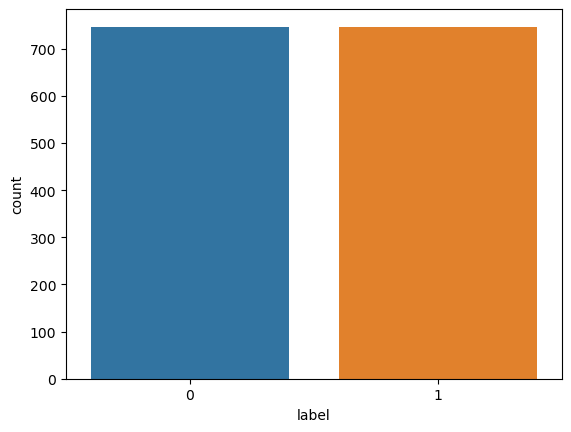

In [24]:
sns.countplot(data["label"])

MODEL BUILDING

In [25]:
# Preprocess the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(spam.message)
y = spam.label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate the model
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

